# Social Networks - Assignment 2

This **Home Assignment** is **mandatory**, it does count towards your final chance to take part in the exam. This assignment covers MCMC sampling and exponential random graphs.

You can expect numpy, matplotlib and networkx to be installed.

## Formalities

**Submit in a group of 3-4 people until 26.05.2022 23:59CET. The deadline is strict!**

You have the opportunity for an prelim submission until 22.05.2022 23:59 CET. We will run your code once, and you can thus see whether there are small bugs that you might not have expected.

## Evaluation and Grading
General advice for programming excercises at *CSSH*:
Evaluation of your submission is done semi-automatically. Think of it as this notebook being 
executed once. Afterwards, some test functions are appended to this file and executed respectively.

Therefore:
* Submit valid _Python3_ code only!
* Use external libraries only when specified by task.
* Ensure your definitions (functions, classes, methods, variables) follow the specification if
  given. The concrete signature of e.g. a function usually can be inferred from task description, 
  code skeletons and test cases.
* Ensure the notebook does not rely on current notebook or system state!
  * Use `Kernel --> Restart & Run All` to see if you are using any definitions, variables etc. that 
    are not in scope anymore.
* Keep your code idempotent! Running it or parts of it multiple times must not yield different
  results. Minimize usage of global variables.
* Ensure your code / notebook terminates in reasonable time.

**There's a story behind each of these points! Don't expect us to fix your stuff!**

Regarding the scores, you will get no points for a task if:
- your function throws an unexpected error (e.g. takes the wrong number of arguments)
- gets stuck in an infinite loop
- takes much much longer than expected (e.g. >1s to compute the mean of two numbers)
- does not produce the desired output (e.g. returns an descendingly sorted list even though we asked for ascending, returns the mean and the std even though we asked for only the mean, prints an output instead of returning it!)

In [57]:
# credentials of all team members (you may add or remove members from the list)
team_members = [
    {
        'first_name': 'Tobias',
        'last_name': 'Holtdirk',
        'student_id': 344175
    },
    {
        'first_name': 'Asma',
        'last_name': 'Aziz',
        'student_id': 426774
    },
    {
        'first_name': 'Seyed Pouria',
        'last_name': 'Mirelmi',
        'student_id': 416910
    }
]

In [2]:
import numpy as np
print(np.__version__)# 1.22.3
assert np.__version__.startswith("1.22")
# it is important that you use the same numpy version as otherwise you will get different random number streams
# and thus none of the examples will look correct

1.22.3


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from functools import partial # <------ gets used a lot in the script, and you will also need it!
from collections import Counter
from itertools import chain

#### Small helper function

In [4]:
def e(u,v):
    """Small helper function that always creates edges that are sorted"""
    # an alternative would be to represent the edges as frozensets
    # I personally prefer to represent them as tuples - nicer printing ;)
    return (min(u,v), max(u,v))

## Task 1) Generic MCMC setup (14 points)


Our generic MCMC setup consists of 4 components.

1) The move generator:
<br>
Produces move suggestions in the form of edges to be added and edges to be deleted. If a move was accepted by the acceptor the suggested move is applied to the graph.

2) The acceptor:
<br>
Potentially accepts a suggested move. The acceptance probability is provided in part by the delta calculator.

3) The delta calculator:
<br>
Is very custom for the kind of graph model you are interested in and calculates $\frac{P(G')}{P(G)}$ based on the current state and the state one potentially transitions into.


4) The random_walker function:
<br>
Is a generator that you can send the number of steps to advance the system. It then uses the acceptor and generator to advance the system accordingly.


### a) The random walker function (1)

We have provided a dummy generator (which always proposes to flip dyad (0,0)) and a dummy acceptor (which accepts the flip with probability 0.5).

Write the random walker which will advance a system a specific number of steps using a move generator and an acceptor.

In [5]:
from typing import Generator

def dummy_generator(E: set[tuple]) -> Generator:
    while True:
        if (0,0) in E:
            # Flip
            print("# Proposing to remove (0,0)")
            accept_change = yield ((0,0),) , tuple()

            if accept_change:
                print("# removing")
                E.remove((0,0))
        else:
            # Flip
            print("# Proposing to add (0,0)")
            accept_change = yield tuple(), ((0,0),)

            if accept_change:
                print("# adding")
                E.add((0,0))
        yield

In [6]:
# test
E = {(1,1)}
itero = dummy_generator(E)

In [7]:
# test
next(itero)
itero.send(True)
E

# Proposing to add (0,0)
# adding


{(0, 0), (1, 1)}

In [8]:
def dummy_acceptor(rng: np.random.Generator, to_remove: tuple, to_add: tuple) -> bool:
    decision =  rng.random() < 0.5
    print("# decision is ", decision)
    return decision

In [9]:
def random_walker(move_generator: Generator, acceptor, num_steps: int):
    for _ in range(num_steps):
        to_remove, to_add = next(move_generator)
        move_generator.send(acceptor(to_remove, to_add))

In [10]:
E = set()
rng1 =np.random.default_rng(1)
acceptor1 = partial(dummy_acceptor, rng1)
generator1 = dummy_generator(E)
walker = partial(random_walker, generator1, acceptor1)
for _ in range(10):
    walker(1) # advance state one step
    print("#", E, "\n")

# Proposing to add (0,0)
# decision is  False
# set() 

# Proposing to add (0,0)
# decision is  False
# set() 

# Proposing to add (0,0)
# decision is  True
# adding
# {(0, 0)} 

# Proposing to remove (0,0)
# decision is  False
# {(0, 0)} 

# Proposing to remove (0,0)
# decision is  True
# removing
# set() 

# Proposing to add (0,0)
# decision is  True
# adding
# {(0, 0)} 

# Proposing to remove (0,0)
# decision is  False
# {(0, 0)} 

# Proposing to remove (0,0)
# decision is  True
# removing
# set() 

# Proposing to add (0,0)
# decision is  False
# set() 

# Proposing to add (0,0)
# decision is  True
# adding
# {(0, 0)} 





# Proposing to add (0,0)
# decision is  False
# set() 

# Proposing to add (0,0)
# decision is  False
# set() 

# Proposing to add (0,0)
# decision is  True
# adding
# {(0, 0)} 

# Proposing to remove (0,0)
# decision is  False
# {(0, 0)} 

# Proposing to remove (0,0)
# decision is  True
# removing
# set() 

# Proposing to add (0,0)
# decision is  True
# adding
# {(0, 0)} 

# Proposing to remove (0,0)
# decision is  False
# {(0, 0)} 

# Proposing to remove (0,0)
# decision is  True
# removing
# set() 

# Proposing to add (0,0)
# decision is  False
# set() 

# Proposing to add (0,0)
# decision is  True
# adding
# {(0, 0)} 



### b) The acceptors

The acceptors decide whether a move was accepted or not (bool, `True` means move is accepted). The model specific delta_calculator return $\frac{P(G')}{P(G)}$ given a suggested move.

Use `rng.random()` to generate the random number used to make the decision. `to_remove` and `to_add` shall be tuples of edges (tuples) corresponding to proposed changes.

### b1) Metropolis-Hastings acceptor (0.5)

The first type is the metropolis-hastings acceptor (deck 04, slide 30, the part with min). 

In [11]:
def metropolis_acceptor(delta_calculator, rng: np.random.Generator, to_remove: tuple[tuple], to_add: tuple[tuple]) -> bool:
    delta = delta_calculator(to_remove, to_add)
    proba = min(1, delta)
    return rng.random() < proba

### b2) Glauber acceptor (0.5)

The acceptance probability for the Glauber acceptor can be found on (deck 04, slide 29)

In [12]:
def glauber_acceptor(delta_calculator, rng: np.random.Generator, to_remove: tuple[tuple], to_add: tuple[tuple]):
    delta = delta_calculator(to_remove, to_add)
    proba = 1/(1+(1/delta))
    return rng.random() < proba


In [13]:
def delta_calculator_05(to_remove, to_add):
    """Dummy delta calculator that just returns 0.5"""
    return 0.5

In [14]:
rng1 = np.random.default_rng(1)
acceptor = partial(glauber_acceptor, delta_calculator_05, rng1)
for i in range(10):
    print("#", acceptor([], []))
    
# False
# False
# True
# False
# True
# False
# False
# False
# False
# True

# False
# False
# True
# False
# True
# False
# False
# False
# False
# True


In [15]:
rng1 = np.random.default_rng(1)
acceptor = partial(metropolis_acceptor, delta_calculator_05, rng1)
for i in range(10):
    print("#", acceptor([], []))
    
# False
# False
# True
# False
# True
# True
# False
# True
# False
# True

# False
# False
# True
# False
# True
# True
# False
# True
# False
# True


### c) Dyad flip move generator (2)

Write a generator that proposes moves as two tuples. The first tuple contains the edge to be added, the second tuple the edge to be removed.

The generator takes as input an $rng$, the number of nodes $n$ and a set of edges `G`. It should update `G` based on the accepted changes and $yield$ the tuples of tuples at each decision point.

Assume that the Graph `G` does support only three things `.add((i,j))` which adds an edge, `.remove((i,j))` to remove an edge and `(i,j) in G` to check whether the Graph contains the edge as well as iteration throught the graph. The tuple `(i,j)` will be treated differently from the tuple `(j,i)`.

To obtain dyads to flip we use a rejection sampling approach, i.e. we sample two integers i,j in [0..n-1] and simply generate new samples if i=j. We then form a dyad from those edges through `e(i,j)`.

In [16]:
def dyad_flip_generator(rng: np.random.Generator, n, G: set):
    while True:
        # rejection sampling
        i = 0
        j = 0
        while i == j:
            i = rng.integers(0, n)
            j = rng.integers(0, n)
        dyad = e(i, j)
        if dyad in G:
            # Flip
            # print(f"# Proposing to remove {dyad}")
            accept_change = yield tuple(), (dyad,)

            if accept_change:
                # print("# removing")
                G.remove(dyad)
        else:
            # Flip
            # print(f"# Proposing to add {dyad}")
            accept_change = yield (dyad,), tuple()

            if accept_change:
                # print("# adding")
                G.add(dyad)
        yield

In [17]:
G = set()
gen = dyad_flip_generator(np.random.default_rng(1), 5, G)
first_move = next(gen)
print("move", first_move) #move (((3, 4),), ())
print("edges before accept", G) #set()
next_move = gen.send(True)
print("edges after accept", G) #{(3, 4)}

for i in range(10):
    move = next(gen)
    print("# move", move)
    gen.send(True)
    
# move (((2, 4),), ())
# move (((1, 4),), ())
# move (((1, 2),), ())
# move (((2, 3),), ())
# move ((), ((3, 4),))
# move ((), ((2, 4),))
# move ((), ((1, 4),))
# move ((), ((2, 3),))
# move (((0, 1),), ())
# move (((0, 2),), ())

move (((3, 4),), ())
edges before accept set()
edges after accept {(3, 4)}
# move (((2, 4),), ())
# move (((1, 4),), ())
# move (((1, 2),), ())
# move (((2, 3),), ())
# move ((), ((3, 4),))
# move ((), ((2, 4),))
# move ((), ((1, 4),))
# move ((), ((2, 3),))
# move (((0, 1),), ())
# move (((0, 2),), ())


### d) Add and delete move generator (4)

The add and delete move generator chooses a dyad that is an edge and a dyad that is not an edge and swaps/sets the non-egde dyad to be an edge and the edge dyad to not be an edge. Thereby, the total number of edges in the model is preserved.

Because the generator needs to be able to efficiently find a dyad that is present, it does some bookkeeping to keep track of an edge-list.


Assume that the Graph G does support only three things `.add((i,j))` which adds an edge, `.remove((i,j))` to remove an edge and `(i,j) in G` to check whether the Graph contains the edge as well as iteration throught the graph to obtain all edges. The tuple `(i,j)` will be treated differently from the tuple `(j,i)`.

Similar to c) we are using rejection sampling to select the non-edge and edge to swap. We are selecting the non-edge similar to c and once we found a valid non edge we chose an edge to swap with from our list of edges. We finally accept the pair of edge and non-edge.

In [18]:
def add_and_delete_generator(rng: np.random.Generator, n: int, G: set):
    E_list = list(G)
    while True:
        # rejection sampling
        i = 0
        j = 0
        while i == j or e(i, j) in G:
            i = rng.integers(0, n)
            j = rng.integers(0, n)
        to_add = e(i, j)
        to_remove = rng.choice(E_list)
        to_remove = tuple(to_remove)
        
        decision = yield to_add, to_remove
        if decision:
            G.remove(to_remove)
            G.add(to_add)
            # replace value in the edge list
            for i in range(len(E_list)):
                if E_list[i] == to_remove:
                    E_list[i] = to_add
        yield

In [19]:
G = set([(0,1 ),(0,2)])
gen = add_and_delete_generator(np.random.default_rng(1), 4, G)

first_move = next(gen)
print("move", first_move) # move (((1, 2),), ((0, 2),))
print("edges before accept", G) # {(0, 1), (0, 2)}
next_move = gen.send(True)
print("edges after accept", G) # {(0, 1), (1, 2)}

for i in range(10):
    move = next(gen)
    print("# move", move)
    gen.send(True)

# move (((0, 3),), ((0, 1),))
# move (((0, 1),), ((1, 2),))
# move (((1, 3),), ((0, 3),))
# move (((2, 3),), ((0, 1),))
# move (((0, 3),), ((1, 3),))
# move (((0, 1),), ((2, 3),))
# move (((1, 3),), ((0, 3),))
# move (((1, 2),), ((1, 3),))
# move (((0, 3),), ((1, 2),))
# move (((2, 3),), ((0, 3),))

move ((1, 2), (0, 2))
edges before accept {(0, 1), (0, 2)}
edges after accept {(0, 1), (1, 2)}
# move ((0, 3), (0, 1))
# move ((0, 1), (1, 2))
# move ((1, 3), (0, 3))
# move ((2, 3), (0, 1))
# move ((0, 3), (1, 3))
# move ((0, 1), (2, 3))
# move ((1, 3), (0, 3))
# move ((1, 2), (1, 3))
# move ((0, 3), (1, 2))
# move ((2, 3), (0, 3))


#### helper functions for the next tasks

In [20]:
def quick_hist(vals, max_val):
    C = Counter(vals)

    x=[]
    y=[]
    for i in range(max_val):
        x.append(i)
        y.append(C[i])
    return x,y

In [21]:
def get_acceptor(method):
    assert method in ["glauber", "metropolis"]
    if method == "metropolis":
        acceptor = metropolis_acceptor
    else:
        acceptor = glauber_acceptor
    return acceptor

### e) MCMC for Gnp (4)

Write the delta calculator for the undirected Gnp model.
Further, given the functions above, construct a method that performs MCMC of Gnp models.

- `n` number of nodes
- `p` the probability that an edge exists
- `n_iter` is the number of samples to draw
- `n_steps` is the number of random walk steps in between samples
- `rng` is the random state

The string `method` is used to switch between Glauber and Metropolis method for accepting moves, see helper function.

In [22]:
# NOTE: to pass the test cases swap to_remove with to_add
def Gnp_delta_calculator(p, to_remove, to_add):
    """calculates the ratio to move from the current state to the next state for the Gnp model"""
    return (p/(1-p))**(len(to_add)-len(to_remove))

In [23]:
# NOTE: to get the correct solutions swap to_remove with to_add
print("#", Gnp_delta_calculator(0.1, ((0,1)), tuple())) # 0.01234567901234568
print("#", Gnp_delta_calculator(0.2, ((0,1)), tuple())) # 0.0625
print("#", Gnp_delta_calculator(0.1, tuple(), ((0,1)))) # 81.0
print("#", Gnp_delta_calculator(0.1, tuple(), tuple())) # 1.0

# 80.99999999999999
# 16.0
# 0.01234567901234568
# 1.0


In [24]:
def MCMC_Gnp(n, p, n_iter, n_steps, rng, starting_edges = set(), method="metropolis"):
    delta_calculator = partial(Gnp_delta_calculator, p)
    for _ in range(n_iter):
        E = starting_edges.copy()
        generator = dyad_flip_generator(rng, n, E)
        acceptor = partial(get_acceptor(method), delta_calculator, rng)
        for _ in range(n_steps):
            to_add, to_remove = next(generator)
            generator.send(acceptor(to_remove, to_add))
        yield E.copy() # yields the edges

In [25]:
l = list(MCMC_Gnp(5, 0.1, 10, 1, np.random.default_rng(2), set()))
for E in l:
    print("#", E)
# set()
# {(2, 4)}
# {(2, 4)}
# {(2, 4), (0, 4)}
# {(2, 4), (0, 4)}
# {(2, 4), (0, 4)}
# {(2, 4), (0, 4)}
# {(0, 4)}
# {(0, 4)}
# {(0, 4)}

# set()
# {(2, 4)}
# set()
# {(0, 4)}
# set()
# set()
# set()
# set()
# set()
# set()


#### For fun, lets plot the degree distribution of the Gnp model

In [26]:
n=30
p=0.3
M = n*(n-1)//2
edge_lens = list(map(len, MCMC_Gnp(n, p, 10000, 10, np.random.default_rng(1))))

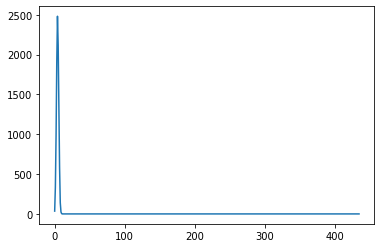

In [27]:
plt.plot(*quick_hist(edge_lens, M))

In [28]:
# check theoretical and simulated mean agree
print(np.mean(edge_lens))
print(p*M)

4.2319
130.5


In [29]:
## Now with glauber method
n=30
p=0.3
M = n*(n-1)//2
edge_lens = list(map(len, MCMC_Gnp(n, p, 10000, 10, np.random.default_rng(1), method="glauber")))

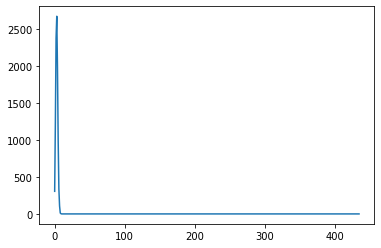

In [30]:
plt.plot(*quick_hist(edge_lens, M))

### f) MCMC for Gmn (2)

Similar to Gnp, construct a sampler that samples from Gmn. The meaning of the parameter values is similar to Gnp.

- `n` number of nodes
- `m` number of edges
- initialize the starting state with th get_m_edges function.

The string `method` is used to switch between Glauber and Metropolis method for accepting moves, see helper function.

In [31]:
def get_m_edges(m, n):
    """Dummy function which fills in m edges for a graph on n nodes"""
    l = []
    c = 0
    for i in range(n):
        for j in range(i+1,n):
            c+=1
            l.append((i,j))
            if c>=m:
                break
        if c>=m:
            break
    return l

In [32]:
def gmn_delta_calc(to_remove, to_add):
    if len(to_remove) != len(to_add):
        return 0
    else:
        return 1

def MCMC_Gmn(n, m, n_iter, n_steps, rng, method = "metropolis"):
    for _ in range(n_iter):
        E = set(get_m_edges(m, n))
        generator = add_and_delete_generator(rng, n, E)
        acceptor = partial(get_acceptor(method), gmn_delta_calc, rng)
        for _ in range(n_steps):
            to_add, to_remove = next(generator)
            generator.send(acceptor(to_remove, to_add))
        yield E.copy() # yields the edges

In [33]:
l = list(MCMC_Gmn(5, 6, 10, 1, np.random.default_rng(2)))
for E in l:
    print("#", sorted(E))
# [(0, 2), (0, 3), (0, 4), (1, 2), (1, 3), (1, 4)]
# [(0, 1), (0, 2), (0, 4), (1, 2), (1, 3), (1, 4)]
# [(0, 1), (0, 4), (1, 2), (1, 3), (1, 4), (2, 3)]
# [(0, 1), (0, 4), (1, 2), (1, 4), (2, 3), (3, 4)]
# [(0, 1), (0, 3), (1, 2), (1, 4), (2, 3), (3, 4)]
# [(0, 1), (0, 2), (0, 3), (1, 2), (1, 4), (2, 3)]
# [(0, 2), (0, 3), (1, 2), (1, 4), (2, 3), (2, 4)]
# [(0, 2), (0, 3), (1, 2), (1, 3), (1, 4), (2, 3)]
# [(0, 1), (0, 2), (0, 3), (1, 2), (1, 4), (2, 3)]
# [(0, 1), (0, 2), (1, 2), (1, 4), (2, 3), (2, 4)]

# [(0, 2), (0, 3), (0, 4), (1, 2), (1, 3), (1, 4)]
# [(0, 1), (0, 3), (0, 4), (1, 2), (1, 3), (3, 4)]
# [(0, 1), (0, 3), (0, 4), (1, 2), (1, 3), (2, 3)]
# [(0, 1), (0, 2), (0, 3), (0, 4), (1, 2), (3, 4)]
# [(0, 1), (0, 2), (0, 3), (0, 4), (1, 2), (3, 4)]
# [(0, 1), (0, 2), (0, 3), (0, 4), (1, 2), (3, 4)]
# [(0, 1), (0, 3), (0, 4), (1, 2), (1, 3), (2, 3)]
# [(0, 1), (0, 3), (0, 4), (1, 2), (1, 3), (2, 4)]
# [(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]
# [(0, 1), (0, 2), (0, 4), (1, 2), (1, 3), (2, 3)]


#### For fun, lets plot the max degree distr

In [34]:
def max_degree(E):
    return Counter(chain.from_iterable(E)).most_common(1)[0][1]//2

In [35]:
n=30
M = n*(n-1)//2
m=int(M*p)
print(m, M, m/M)
max_degree_list = list(map(max_degree, MCMC_Gmn(n, m, 10000, 10, np.random.default_rng(1))))
len(max_degree_list)

130 435 0.2988505747126437


10000

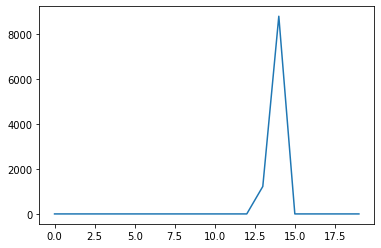

In [36]:
plt.plot(*quick_hist(max_degree_list, 20))

## 2) The exponential random graph model with softly constrained first and second moment of the degree distribution (11 points)
In this simple exponential random graph model, we constrain the first and second moment of the degree distribution by using parameters $\alpha$ and  $\beta$. The term within the exponential function for the transition from Graph $G$ to graph $G'$ reads:

$$
\Delta_{ij} = \alpha \left(\sum_l k_l(G') - \sum_l k_l(G) \right) +  \beta \left(\sum_l k_l^2 (G') - \sum_l k_l^2 (G)\right)
$$
which simplifies to 
$$
\Delta_{ij} = \pm 2  \left ( \alpha + \beta [k_i(G) + k_j(G)]\right ) + 2 \beta 
$$
for the case of one single dyad flip. The minus is used when the edge ij is in $G$ and the plus is used when ij is not in $G$.

Why should we be interested in this model? This model exhibits two phases with a low probability to transition between them. It essentially "breaks" ergodicity for "reasonable" number of simulation steps while being ergodic in principle. More on that in subtask d).

### a) Degree tracking (1)
Write a class `DegreeTrackerGraph` that in addition to the edges being in the graph also tracks the degree of all the nodes.

In [37]:
from collections import defaultdict

class DegreeTrackerGraph():
    def __init__(self, E: set):
        self.E = E
        self.degrees = defaultdict(int)
        for u, v in E:
            self.degrees[u] += 1
            self.degrees[v] += 1

    
    def add(self, edge: tuple):
        """Add edge to the graph, update degrees"""
        self.E.add(edge)
        u, v = edge
        self.degrees[u] += 1
        self.degrees[v] += 1

        
    def remove(self, edge):
        """Remove edge from the graph, update degrees"""
        self.E.remove(edge)
        u, v = edge
        self.degrees[u] -= 1
        self.degrees[v] -= 1
        
    def __contains__(self, edge):
        """Check whether edge is in the graph"""
        return edge in self.E
    
    def __iter__(self):
        """returns an iter for this class"""
        #do sth like return iter(self.E)
        return iter(self.E)
        
    def degree(self, node):
        """Returns the degree of node"""
        return self.degrees[node]

In [38]:
G = DegreeTrackerGraph(set())
G.add((0,1))
G.add((1,2))
print(G.__contains__((1,3)))
print(G.__contains__((1,2)))
print(G.degree(1))
print(G.degree(0))
G.remove((1,2))
print(G.__contains__((1,2)))

# False
# True
# 2
# 1
# False

False
True
2
1
False


In [39]:
# testing the __iter__ method.
G.add((1,2))
for edge in G:
    print("#", edge)
# (0, 1)
# (1, 2)


# (0, 1)
# (1, 2)


In [40]:
import networkx as nx

### b) Delta for the two moment model (2)
Write a function that computes the $\exp(\Delta)$ for the two moment model. You may assume that the graph has a function `.degree(node)` that returns the degree of that node.

In [41]:
def two_moment_delta_calculator(G: DegreeTrackerGraph, alpha: float, beta: float, to_remove: list[tuple], to_add: list[tuple]) -> float:
    # NOTE: this assumes only to_add or only to_remove to be filled with one entry
    # NOTE: i would get the correct results for the test cases if i use G' instead of G here (i.e. increase/decrease note degree by one) but this seems incocrect regarding the formula given in the task description
    if to_add and to_add[0]:
        i, j = to_add[0]
        if e(i, j) in G:
            return None
        k_i = G.degree(i)
        k_j = G.degree(j)
        # dont use minus as ij is not in G
        delta = 2 * (alpha + beta * (k_i + k_j)) + 2 * beta
        return np.exp(delta)
    if to_remove and to_remove[0]:
        i, j = to_remove[0]
        if e(i, j) not in G:
            return None
        k_i = G.degree(i)
        k_j = G.degree(j)
        # use minus as ij is in G
        delta = -2 * (alpha + beta * (k_i + k_j)) + 2 * beta
        return np.exp(delta)
    return None

In [42]:
G = DegreeTrackerGraph(set())
G.add((0,1))
print(two_moment_delta_calculator(G, 0.2, 0.3, ((1,3),),((1,2),)))
print(two_moment_delta_calculator(G, 0.2, 0.3, ((1,3),),((2,3),)))
print(two_moment_delta_calculator(G, 0.2, 0.3, ((1,3),), tuple(tuple())))

# 0.20189651799465538
# 0.36787944117144233
# 4.953032424395115

4.953032424395115
2.718281828459045
None


### c) Putting things together (3)
Write a function that allows sampling from the two moment model. Thereby, use your defined 2-star delta calculator, and the `DegreeTrackerGraph` class.

The string `method` is used to switch between Glauber and Metropolis method for accepting moves, see helper function.

In [43]:
def MCMC_two_moment(n, alpha, beta, sample_at, rng, G, method="metropolis"):
    generator = dyad_flip_generator(rng, n, G)
    delta_calculator = partial(two_moment_delta_calculator, G, alpha, beta)
    acceptor = partial(get_acceptor(method), delta_calculator, rng)
    for i in range(max(sample_at)):
        to_add, to_remove = next(generator)
        # print(to_add, to_remove)
        generator.send(acceptor(to_remove, to_add))
        if i+1 in sample_at:
            yield G.E # yields the edges

In [44]:
G = DegreeTrackerGraph(set())
G.add((0,1))
G.add((1,2))
sample_at = [1,5,10]
gen = MCMC_two_moment(10, 0.3, 0.4, sample_at, np.random.default_rng(42), G)
for _ in sample_at:
    print(next(gen))
for i in range(10):
    print("#", i, G.degree(i))

# {(0, 1), (0, 7), (1, 2)}
# {(0, 1), (0, 7), (0, 2), (1, 2), (4, 8), (1, 5), (3, 5)}
# {(0, 1), (0, 7), (1, 2), (1, 5), (3, 7), (6, 7), (0, 2), (4, 5), (2, 6), (4, 8), (0, 5), (3, 5)}
# 0 4
# 1 3
# 2 3
# 3 2
# 4 2
# 5 4
# 6 2
# 7 3
# 8 1
# 9 0

{(0, 1), (0, 7), (1, 2)}
{(0, 1), (0, 7), (1, 2), (1, 5), (0, 2), (4, 8), (3, 5)}
{(0, 1), (0, 7), (1, 2), (1, 5), (3, 7), (6, 7), (0, 2), (4, 5), (2, 6), (4, 8), (0, 5), (3, 5)}
# 0 4
# 1 3
# 2 3
# 3 2
# 4 2
# 5 4
# 6 2
# 7 3
# 8 1
# 9 0


### d) The "phases" of the two moment model (3)

We have shown that the sampling schema produces an ergodic markov chain which means that independent of the starting vector for sufficiently large number of iterations it will converge to a unique stationary distribution. But the number of iterations required to reach ergodicity in practice can be enourmous.

The two moment model is know to exhibit two "phases", depending on the parameters $\alpha$ and $\beta$. In particular, a high density state and a low density state. The transition probability between these two phases is tiny. This effectively means, that when the parameters $\alpha$ and $\beta$ allow for both phases, we  effectively see ergodicity breaking on "reasonable" simulation timescales. That is, the state that we observe *will* depend on initial conditions.

To that end, plot the average degree of the two moment model as it evolves as a function of simulation steps for various initial conditions.

We choose a undirected system of 300 nodes. As initial state we choose a random sample from the Gnp model with p in `[0.0, 0.03, 0.06, 0.09, 0.12]`.
We observe average degree for timesteps as outlined below.
Create three figures with log-log scales containing the simulation results for
1) $\alpha, \beta$ = (-2, 0.01),

2) $\alpha, \beta$ = (-2, 0.016),

3) $\alpha, \beta$ = (-2, 0.03)

Save the figures here in the script as  `figure1.png`, `figure2.png`, `figure3.png` respectively.

Each figure contains the 5 different initial conditions.
<br>
_NOTE_: Executing the code for this task might take a while until completion

In [45]:
from tqdm.notebook import tqdm

In [46]:
timesteps_to_sample_at = []
for i in range(1,6):
    for j in range(1,10):
        timesteps_to_sample_at.append(j * 10**i)
timesteps_to_sample_at.extend([1_000_000+ i * 100_000 for i in range(10)])

In [47]:
print(timesteps_to_sample_at)

[10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000, 200000, 300000, 400000, 500000, 600000, 700000, 800000, 900000, 1000000, 1100000, 1200000, 1300000, 1400000, 1500000, 1600000, 1700000, 1800000, 1900000]


In [48]:
ps = [x/100 for x in range(0,13,3)]
print(ps)

[0.0, 0.03, 0.06, 0.09, 0.12]


In [49]:
def naive_gnp_sampler(n, p):
    G = DegreeTrackerGraph(set())
    for i in range(n):
        for j in range(n):
            if i < j:
                if np.random.random() < p:
                    G.add((i,j))
    return G

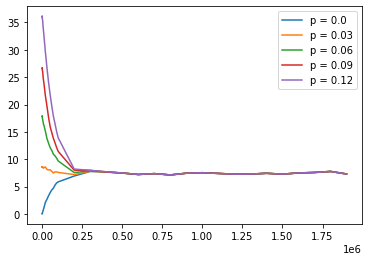

In [50]:
fig = plt.figure()
"""Your Code HERE instead"""
n = 300
alpha = -2
beta = 0.01
for p in [0.0, 0.03, 0.06, 0.09, 0.12]:
    G = naive_gnp_sampler(n, p)
    gen = MCMC_two_moment(n=n, alpha=alpha, beta=beta, sample_at=timesteps_to_sample_at, rng=np.random.default_rng(24), G=G)
    avg_k_list = []
    for _ in timesteps_to_sample_at:
        temp_G = next(gen)
        avg_k_list.append(np.sum(list(G.degrees.values()))/n)
    plt.plot(timesteps_to_sample_at, avg_k_list, label=f'p = {p}')
plt.legend()
plt.savefig("figure1.png")#very important!, similar for the other figures.

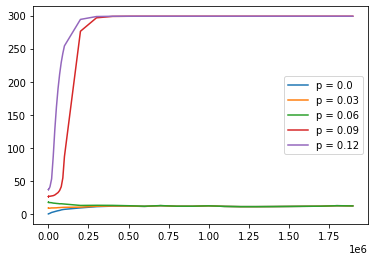

In [51]:
fig = plt.figure()
"""Your Code HERE instead"""
n = 300
alpha = -2
beta = 0.016
for p in [0.0, 0.03, 0.06, 0.09, 0.12]:
    G = naive_gnp_sampler(n, p)
    gen = MCMC_two_moment(n=n, alpha=alpha, beta=beta, sample_at=timesteps_to_sample_at, rng=np.random.default_rng(24), G=G)
    avg_k_list = []
    for _ in timesteps_to_sample_at:
        temp_G = next(gen)
        avg_k_list.append(np.sum(list(G.degrees.values()))/n)
    plt.plot(timesteps_to_sample_at, avg_k_list, label=f'p = {p}')
plt.legend()
plt.savefig("figure2.png")#very important!, similar for the other figures.

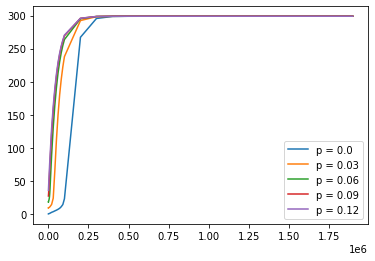

In [52]:
fig = plt.figure()
"""Your Code HERE instead"""
n = 300
alpha = -2
beta = 0.03
for p in [0.0, 0.03, 0.06, 0.09, 0.12]:
    G = naive_gnp_sampler(n, p)
    gen = MCMC_two_moment(n=n, alpha=alpha, beta=beta, sample_at=timesteps_to_sample_at, rng=np.random.default_rng(24), G=G)
    avg_k_list = []
    for _ in timesteps_to_sample_at:
        temp_G = next(gen)
        avg_k_list.append(np.sum(list(G.degrees.values()))/n)
    plt.plot(timesteps_to_sample_at, avg_k_list, label=f'p = {p}')
plt.legend()
plt.savefig("figure3.png")#very important!, similar for the other figures.

### e) Burn-in time (2)

Use the plots from 2d) to read of a burn-in time that is necessary for this particular model. Explain your choice.

In [53]:
text_2e = "The necessary burn-in time seems to be around 300,000 iterations, because the average degree doesn't change significantly after that number of iterations for all initialization states of G and for all the different beta parameters that were choosen."